In [1]:
!nvidia-smi

Thu Aug  3 02:00:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing_data = fetch_california_housing()

In [4]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
X = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

In [9]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
y=pd.DataFrame(housing_data.target,columns=['target'])

In [11]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [15]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [16]:
X_train_full.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45


In [14]:
X_train.shape

(14448, 8)

In [17]:
X_train,X_train_valid,y_train,y_train_valid = train_test_split(X_train_full,y_train_full, random_state=42, test_size=0.3)

In [20]:
X_train.shape[1:]

(8,)

In [21]:
#implementing layers

In [19]:
LAYERS = [
         tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
         tf.keras.layers.Dense(10, activation="relu"),
         tf.keras.layers.Dense(5, activation='relu'),
         tf.keras.layers.Dense(1)

]

In [22]:
model = tf.keras.models.Sequential(LAYERS)

In [23]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [24]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [28]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_train_valid)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [30]:
EPOCHS = 5

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_train_valid))

Epoch 1/5
317/317 [==============================] - 7s 5ms/step - loss: 1.2288 - coeff_determination: -6693.0933 - val_loss: 3817.2112 - val_coeff_determination: -3208.6365
Epoch 2/5
317/317 [==============================] - 1s 4ms/step - loss: 0.4861 - coeff_determination: -51451.3945 - val_loss: 4874.9512 - val_coeff_determination: -4106.9653
Epoch 3/5
317/317 [==============================] - 1s 4ms/step - loss: 0.4293 - coeff_determination: -1037.0496 - val_loss: 4296.2314 - val_coeff_determination: -3636.7100
Epoch 4/5
317/317 [==============================] - 1s 4ms/step - loss: 0.4010 - coeff_determination: -149.1414 - val_loss: 935.7872 - val_coeff_determination: -761.8912
Epoch 5/5
317/317 [==============================] - 1s 4ms/step - loss: 0.3879 - coeff_determination: -5914.5811 - val_loss: 8337.0322 - val_coeff_determination: -6911.7861


In [31]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,1.228779,-6693.093262,3817.211182,-3208.636475
1,0.486108,-51451.394531,4874.951172,-4106.965332
2,0.429319,-1037.049561,4296.231445,-3636.709961
3,0.400968,-149.141373,935.787170,-761.891235
4,0.387909,-5914.581055,8337.032227,-6911.786133


<Axes: >

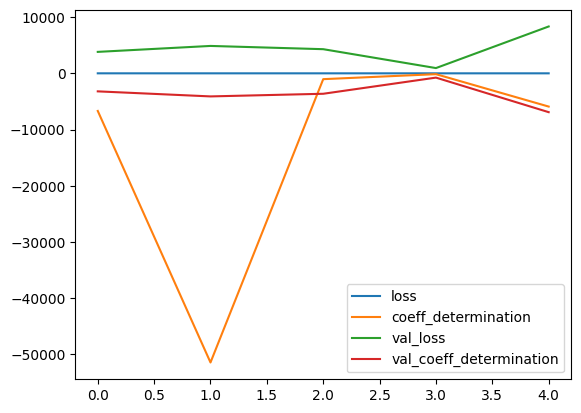

In [32]:
pd.DataFrame(history.history).plot()

In [33]:
model.evaluate(X_test, y_test)

194/194 [==============================] - 2s 9ms/step - loss: 8008.8101 - coeff_determination: -7212.2622


[8008.81005859375, -7212.26220703125]

In [34]:
X_test.shape

(6192, 8)

In [35]:
new = X_test[0]

In [36]:
new

array([ 1.68120000e+00,  2.50000000e+01,  4.19220056e+00,  1.02228412e+00,
        1.39200000e+03,  3.87743733e+00,  3.60600000e+01, -1.19010000e+02])

In [37]:
new.reshape((1,8))

array([[ 1.68120000e+00,  2.50000000e+01,  4.19220056e+00,
         1.02228412e+00,  1.39200000e+03,  3.87743733e+00,
         3.60600000e+01, -1.19010000e+02]])

In [38]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 115ms/step


array([[-76.01247]], dtype=float32)

In [40]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
17505,2.37500
13512,0.67300
10842,2.18400
16559,1.19400
